In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
wine = load_wine()
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
target = pd.DataFrame(wine['target'], columns=['cultivator'])
df = pd.concat([target, data], axis='columns')
df.head()

,cultivator,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
# Trim the data
df = df[['cultivator', 'total_phenols']]
df.head()

,cultivator,total_phenols
0,0,2.80
1,0,2.65
2,0,2.80
3,0,3.85
4,0,2.80


In [4]:
grouped_data = df.groupby('cultivator')['total_phenols'].apply(list)
grouped_data

cultivator
0    [2.8, 2.65, 2.8, 3.85, 2.8, 3.27, 2.5, 2.6, 2....
1    [1.98, 2.05, 2.02, 2.1, 3.5, 1.89, 2.42, 2.98,...
2    [1.51, 1.3, 1.15, 1.7, 2.0, 1.62, 1.38, 1.79, ...
Name: total_phenols, dtype: object

Text(0, 0.5, 'Total Phenols')

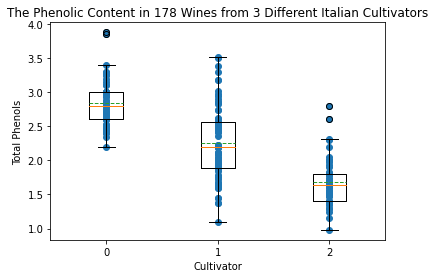

In [10]:
plt.boxplot(grouped_data, positions=range(0, len(df['cultivator'].unique())), showmeans=True, meanline=True)
plt.scatter(df['cultivator'], df['total_phenols'])
plt.title('The Phenolic Content in 178 Wines from 3 Different Italian Cultivators')
plt.xlabel('Cultivator')
plt.ylabel('Total Phenols')


In [40]:
# import itertools
# new_df = [grouped_data[0],grouped_data[1],grouped_data[2]]

# # new_df = pd.DataFrame((_ for _ in itertools.zip_longest(*new_df)), columns=['0', '1', '2'])
# new_df = pd.DataFrame(new_df, ['0', '1', '2']).T
# new_df.head()

,0,1,2
0,2.80,1.98,1.51
1,2.65,2.05,1.30
2,2.80,2.02,1.15
3,3.85,2.10,1.70
4,2.80,3.50,2.00


In [51]:
df[['cultivator','total_phenols']].to_excel('anova.xlsx')

# with pd.ExcelWriter('output.xlsx',
#                     mode='a') as writer:  
#     df[['cultivator','total_phenols']].to_excel(writer, sheet_name='Sheet_name_3')

In [47]:
mod = ols('cultivator ~ total_phenols', data=df[['cultivator','total_phenols']]).fit()
table=sm.stats.anova_lm(mod)
print(table)

                  df     sum_sq    mean_sq           F        PR(>F)
total_phenols    1.0  54.988385  54.988385  188.537094  1.234051e-29
Residual       176.0  51.331839   0.291658         NaN           NaN
